## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  73.836094   456.155086  0.394992  8.962362  1.292895
1  56.172210  1331.612568  0.872316  4.654203  1.506411
2  40.576632   773.808193  0.626822  7.509500  1.367288
3  19.877856  1010.203633  0.108371  6.138962  1.256452
4  32.564101   129.802988  0.030385  6.302464  0.137688


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0659695	total: 63.8ms	remaining: 1m 3s
1:	learn: 1.0564065	total: 64.4ms	remaining: 32.2s
2:	learn: 1.0454231	total: 64.9ms	remaining: 21.6s
3:	learn: 1.0347626	total: 65.5ms	remaining: 16.3s
4:	learn: 1.0237556	total: 66ms	remaining: 13.1s
5:	learn: 1.0161032	total: 66.4ms	remaining: 11s
6:	learn: 1.0083242	total: 66.9ms	remaining: 9.49s
7:	learn: 0.9985399	total: 67.4ms	remaining: 8.35s
8:	learn: 0.9899317	total: 67.9ms	remaining: 7.47s
9:	learn: 0.9830401	total: 68.4ms	remaining: 6.77s
10:	learn: 0.9744876	total: 68.8ms	remaining: 6.18s
11:	learn: 0.9668520	total: 69.2ms	remaining: 5.7s
12:	learn: 0.9574088	total: 69.6ms	remaining: 5.28s
13:	learn: 0.9490464	total: 70ms	remaining: 4.93s
14:	learn: 0.9405242	total: 70.5ms	remaining: 4.63s
15:	learn: 0.9318791	total: 71ms	remaining: 4.36s
16:	learn: 0.9233965	total: 71.4ms	remaining: 4.13s
17:	learn: 0.9167767	total: 71.8ms	remaining: 3.92s
18:	learn: 0.9110797	total: 72.1ms	remaining: 3.72s
1

101:	learn: 0.4928692	total: 109ms	remaining: 957ms
102:	learn: 0.4901015	total: 109ms	remaining: 951ms
103:	learn: 0.4868032	total: 110ms	remaining: 945ms
104:	learn: 0.4834049	total: 110ms	remaining: 937ms
105:	learn: 0.4807202	total: 110ms	remaining: 931ms
106:	learn: 0.4771999	total: 111ms	remaining: 924ms
107:	learn: 0.4743131	total: 111ms	remaining: 920ms
108:	learn: 0.4712466	total: 112ms	remaining: 914ms
109:	learn: 0.4687889	total: 112ms	remaining: 908ms
110:	learn: 0.4658164	total: 113ms	remaining: 901ms
111:	learn: 0.4634320	total: 113ms	remaining: 896ms
112:	learn: 0.4613469	total: 113ms	remaining: 890ms
113:	learn: 0.4592749	total: 114ms	remaining: 885ms
114:	learn: 0.4571545	total: 114ms	remaining: 879ms
115:	learn: 0.4549144	total: 115ms	remaining: 873ms
116:	learn: 0.4518396	total: 115ms	remaining: 867ms
117:	learn: 0.4493039	total: 115ms	remaining: 861ms
118:	learn: 0.4474171	total: 115ms	remaining: 854ms
119:	learn: 0.4447270	total: 116ms	remaining: 849ms
120:	learn: 

273:	learn: 0.2372004	total: 186ms	remaining: 492ms
274:	learn: 0.2368226	total: 186ms	remaining: 491ms
275:	learn: 0.2364534	total: 187ms	remaining: 490ms
276:	learn: 0.2360733	total: 187ms	remaining: 489ms
277:	learn: 0.2356364	total: 188ms	remaining: 487ms
278:	learn: 0.2352791	total: 188ms	remaining: 486ms
279:	learn: 0.2349064	total: 189ms	remaining: 485ms
280:	learn: 0.2345893	total: 189ms	remaining: 484ms
281:	learn: 0.2337219	total: 190ms	remaining: 483ms
282:	learn: 0.2328030	total: 190ms	remaining: 481ms
283:	learn: 0.2324947	total: 190ms	remaining: 480ms
284:	learn: 0.2321569	total: 191ms	remaining: 478ms
285:	learn: 0.2314302	total: 191ms	remaining: 477ms
286:	learn: 0.2304878	total: 192ms	remaining: 476ms
287:	learn: 0.2301218	total: 192ms	remaining: 475ms
288:	learn: 0.2298133	total: 193ms	remaining: 474ms
289:	learn: 0.2290107	total: 193ms	remaining: 473ms
290:	learn: 0.2285903	total: 194ms	remaining: 472ms
291:	learn: 0.2277155	total: 194ms	remaining: 470ms
292:	learn: 

514:	learn: 0.1374243	total: 290ms	remaining: 274ms
515:	learn: 0.1368426	total: 291ms	remaining: 273ms
516:	learn: 0.1363574	total: 291ms	remaining: 272ms
517:	learn: 0.1360311	total: 292ms	remaining: 272ms
518:	learn: 0.1359775	total: 292ms	remaining: 271ms
519:	learn: 0.1356580	total: 293ms	remaining: 270ms
520:	learn: 0.1353447	total: 293ms	remaining: 270ms
521:	learn: 0.1350375	total: 294ms	remaining: 269ms
522:	learn: 0.1349859	total: 294ms	remaining: 268ms
523:	learn: 0.1344535	total: 294ms	remaining: 267ms
524:	learn: 0.1339883	total: 295ms	remaining: 267ms
525:	learn: 0.1335328	total: 295ms	remaining: 266ms
526:	learn: 0.1330195	total: 296ms	remaining: 265ms
527:	learn: 0.1324906	total: 297ms	remaining: 265ms
528:	learn: 0.1320069	total: 297ms	remaining: 265ms
529:	learn: 0.1316086	total: 298ms	remaining: 264ms
530:	learn: 0.1315212	total: 298ms	remaining: 263ms
531:	learn: 0.1314350	total: 298ms	remaining: 262ms
532:	learn: 0.1313501	total: 299ms	remaining: 262ms
533:	learn: 

699:	learn: 0.0906107	total: 368ms	remaining: 158ms
700:	learn: 0.0904962	total: 369ms	remaining: 157ms
701:	learn: 0.0903257	total: 369ms	remaining: 157ms
702:	learn: 0.0902112	total: 369ms	remaining: 156ms
703:	learn: 0.0900817	total: 370ms	remaining: 156ms
704:	learn: 0.0899714	total: 371ms	remaining: 155ms
705:	learn: 0.0897877	total: 371ms	remaining: 154ms
706:	learn: 0.0896084	total: 371ms	remaining: 154ms
707:	learn: 0.0893981	total: 372ms	remaining: 153ms
708:	learn: 0.0890469	total: 372ms	remaining: 153ms
709:	learn: 0.0887042	total: 373ms	remaining: 152ms
710:	learn: 0.0883307	total: 373ms	remaining: 152ms
711:	learn: 0.0882189	total: 373ms	remaining: 151ms
712:	learn: 0.0878507	total: 374ms	remaining: 150ms
713:	learn: 0.0877402	total: 374ms	remaining: 150ms
714:	learn: 0.0873771	total: 375ms	remaining: 149ms
715:	learn: 0.0872678	total: 375ms	remaining: 149ms
716:	learn: 0.0869608	total: 376ms	remaining: 148ms
717:	learn: 0.0868644	total: 376ms	remaining: 148ms
718:	learn: 

931:	learn: 0.0536045	total: 473ms	remaining: 34.5ms
932:	learn: 0.0535573	total: 473ms	remaining: 34ms
933:	learn: 0.0535108	total: 474ms	remaining: 33.5ms
934:	learn: 0.0533025	total: 474ms	remaining: 32.9ms
935:	learn: 0.0531834	total: 475ms	remaining: 32.4ms
936:	learn: 0.0530211	total: 475ms	remaining: 31.9ms
937:	learn: 0.0529752	total: 475ms	remaining: 31.4ms
938:	learn: 0.0529242	total: 476ms	remaining: 30.9ms
939:	learn: 0.0527505	total: 476ms	remaining: 30.4ms
940:	learn: 0.0527048	total: 477ms	remaining: 29.9ms
941:	learn: 0.0526595	total: 477ms	remaining: 29.4ms
942:	learn: 0.0525029	total: 478ms	remaining: 28.9ms
943:	learn: 0.0524526	total: 478ms	remaining: 28.4ms
944:	learn: 0.0522714	total: 478ms	remaining: 27.8ms
945:	learn: 0.0521828	total: 479ms	remaining: 27.3ms
946:	learn: 0.0521385	total: 479ms	remaining: 26.8ms
947:	learn: 0.0519384	total: 480ms	remaining: 26.3ms
948:	learn: 0.0518935	total: 480ms	remaining: 25.8ms
949:	learn: 0.0518404	total: 480ms	remaining: 25

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

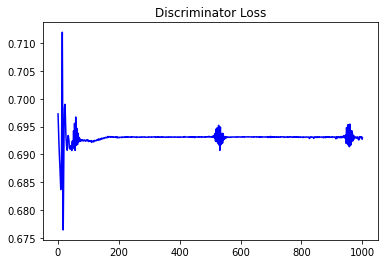

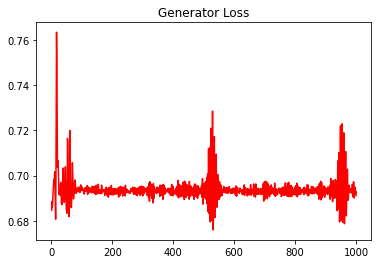

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.214904310489138


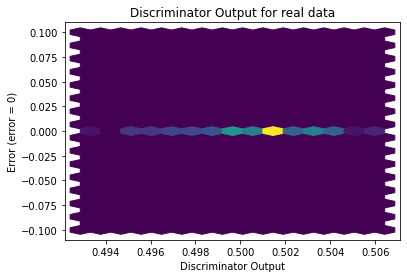

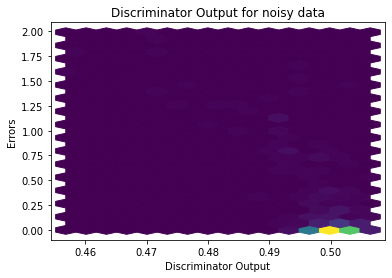

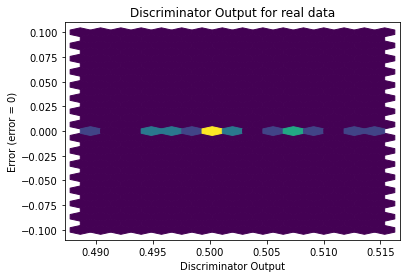

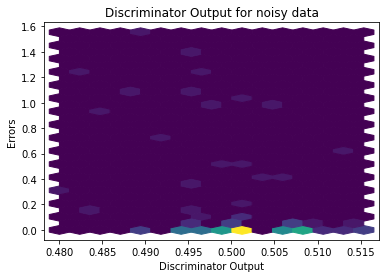

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


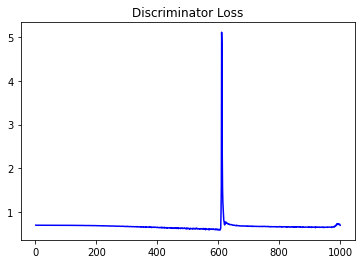

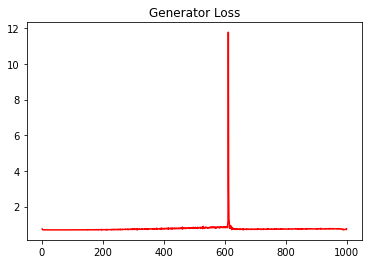

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.21272962584192615


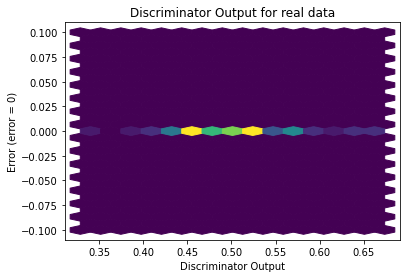

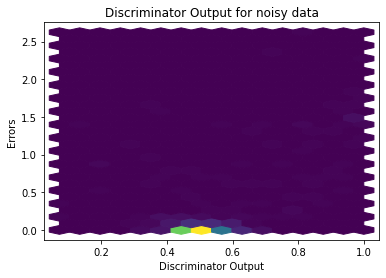

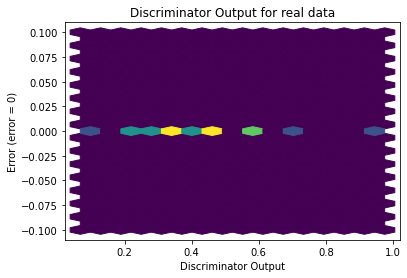

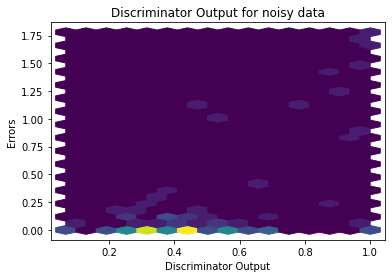

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0250]], requires_grad=True)
